## YOLOv9 (cart, 2classes, removed patient 5 and patient 2: 359-394) vs GT consensus

In [3]:
import fiftyone as fo

dataset = fo.load_dataset('final_exp')
# Get the 10 most common classes in the dataset
counts = dataset.count_values("GT_2cl.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:2]

# Evaluate the objects in the `predictions` field with respect to the
# objects in the `ground_truth` field
results = dataset.evaluate_detections(
    pred_field="preds_cart_yolo9e_2cl_perf_fr",
    gt_field="GT_2cl_perf_fr",
    eval_key="GT_vs_yolo9_cart_2cl_perf_fr",
    method="coco",
    compute_mAP=True,
    iou=0.25,
    classwise=False
)

# Print a classification report for the top-10 classes
results.print_report(classes=classes)

# Print some statistics about the total TP/FP/FN counts
print("TP: %d" % dataset.sum("GT_vs_yolo9_cart_2cl_perf_fr_tp"))
print("FP: %d" % dataset.sum("GT_vs_yolo9_cart_2cl_perf_fr_fp"))
print("FN: %d" % dataset.sum("GT_vs_yolo9_cart_2cl_perf_fr_fn"))


Evaluating detections...
 100% |███████████████| 2019/2019 [17.5s elapsed, 0s remaining, 87.2 samples/s]       
Performing IoU sweep...
 100% |███████████████| 2019/2019 [13.2s elapsed, 0s remaining, 105.4 samples/s]      
              precision    recall  f1-score   support

     covered       0.80      0.87      0.83      6141
   uncovered       0.66      0.30      0.41      1777

   micro avg       0.78      0.74      0.76      7918
   macro avg       0.73      0.58      0.62      7918
weighted avg       0.77      0.74      0.74      7918

TP: 5864
FP: 1610
FN: 2054


In [4]:
print(results.mAP()) #
plot = results.plot_pr_curves(classes=classes)
plot.show()

0.42069179119000066


FigureWidget({
    'data': [{'customdata': array([    0.88423,     0.85055,     0.84492,     0.84181,     0.83882,
                                       0.83681,     0.83489,     0.83325,     0.83152,     0.83011,
                                       0.82832,     0.82696,     0.82562,     0.82402,     0.82274,
                                       0.82105,     0.81964,     0.81836,     0.81672,      0.8155,
                                       0.81428,     0.81302,     0.81178,     0.81005,     0.80848,
                                       0.80703,     0.80546,     0.80383,     0.80228,     0.80074,
                                       0.79919,     0.79772,     0.79585,     0.79378,     0.79178,
                                       0.78969,     0.78757,      0.7855,     0.78316,     0.78075,
                                       0.77802,     0.77533,     0.77274,     0.76976,     0.76692,
                                       0.76356,     0.76042,     0.75707,     0.75348

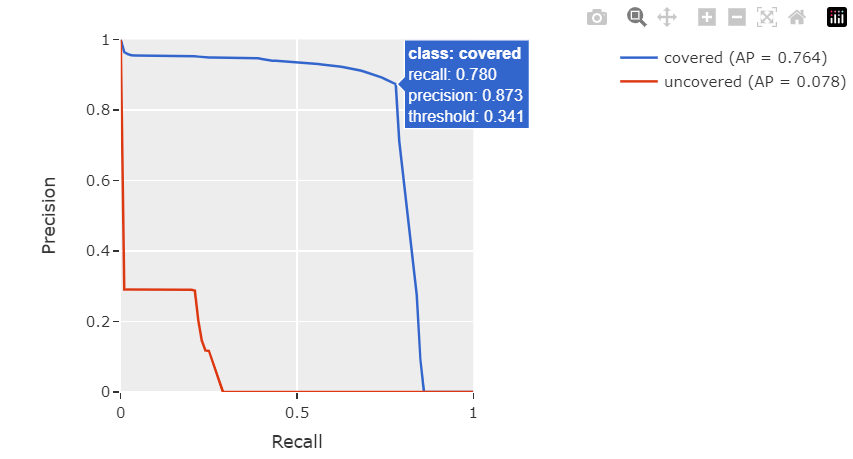
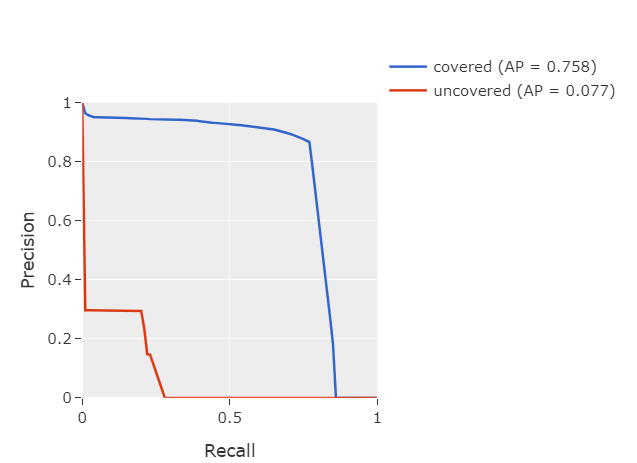
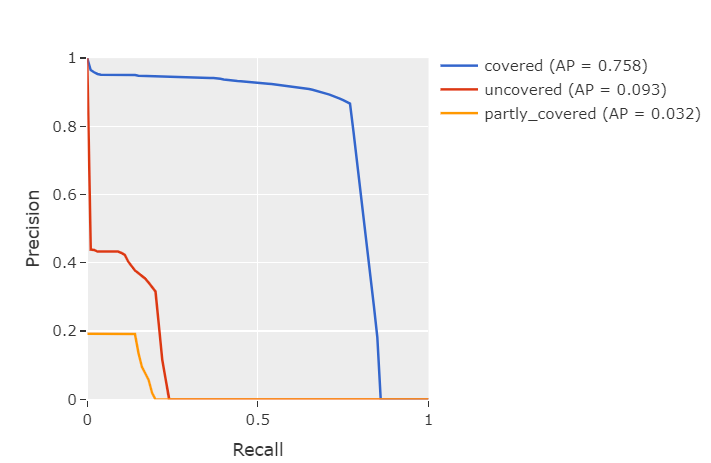

C:\Users\MikhailDarakhovich\AppData\Local\Temp\ipykernel_45380\88602896.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



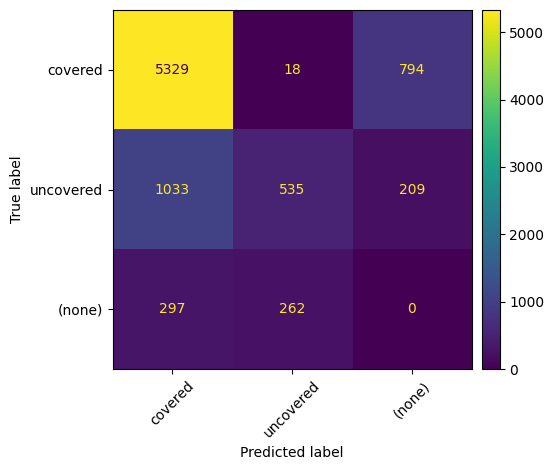

In [5]:
plot = results.plot_confusion_matrix(backend="matplotlib")
plot.show()

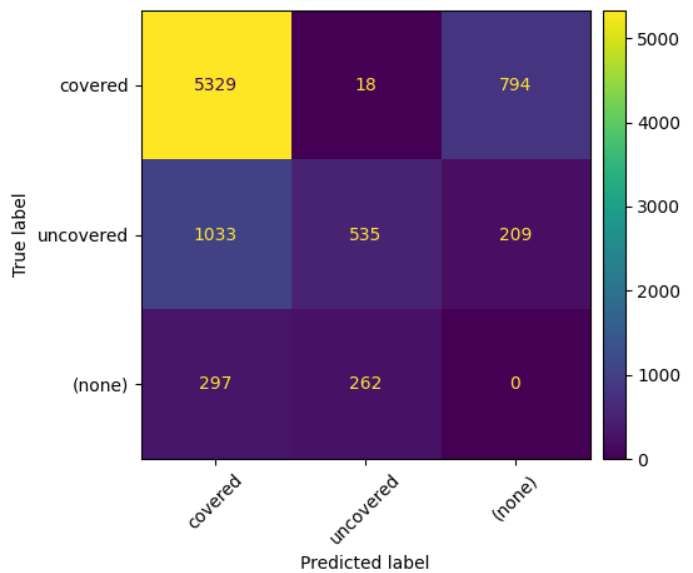
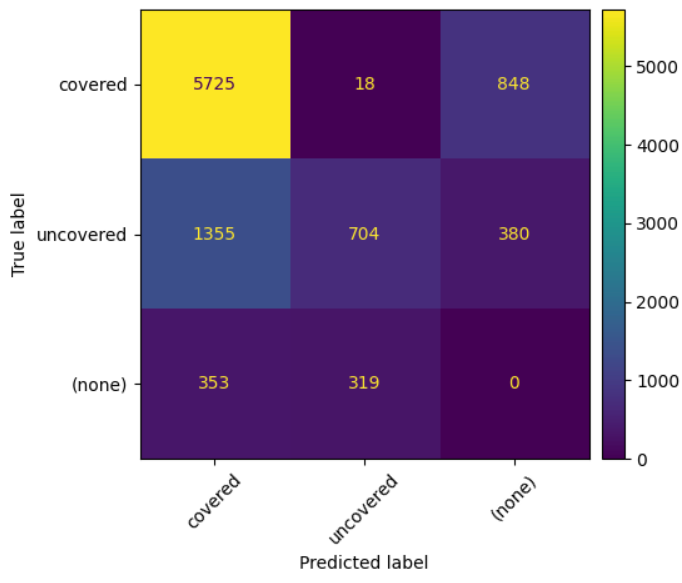